# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import math

# loading the face detection classifier: IT RUNS HAAR CASCADE ALGORITHM
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

In [2]:
# THIS OPENS THE ZIP_FILE AND EXTRACT ALL FILES IN CURRENT DIRECTORY AND STORES THE NAMES OF THE FILES IN A LIST
with zipfile.ZipFile("readonly/small_img.zip","r") as Z:
    File_Names = Z.namelist()
    for i in File_Names:
        Z.extract(i)

In [3]:
# LETS PRINT THE NAME OF ALL THE FILES EXTRACTED ABOVE
print(File_Names)

['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png']


In [4]:
# THIS IS TO CHECK IF ALL THE TEXT IN 'a-0.png' IS STORED IN THE TEST DICTIONARY.
image=Image.open('a-3.png')
test={}
test['a-3.png'] = pytesseract.image_to_string(image)
print("PROCESS COMPLETED")

PROCESS COMPLETED


In [5]:
# TESTING IF TEST DICTIONARY IS CREATED CORRECTLY
print(test.keys())
# LETS AVOID PRINTING THE WHOLE DOCUMENT: print(test['a-0.png'])
# LETS COUNT OCCURANCE OF A STRING IN A DOCUMENT.
print(test['a-3.png'].count("Christopher"))

dict_keys(['a-3.png'])
1


In [6]:
# THIS IS WHERE WE EXTRACT ALL THE TEXT IN ALL THE FILES PRESENT IN ZIP_FILE AND SAVE THAT TEXT IN DICTIONARY
# KEYS OF THE DICTIONARY ARE THE NAMES OF THE FILES
Text_Dictionary = {}
for file in File_Names:
    image=Image.open(file)
    Text_Dictionary[file] = pytesseract.image_to_string(image)

In [7]:
# KEYS OF THE DICTIONARY THAT SAVED ALL THE TEXT FROM THE FILES ARE THE NAMES OF THE FILES
print(Text_Dictionary.keys())

dict_keys(['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png'])


In [8]:
# LET US SEARCH A STRING IN WHOLE DICTIONARY
# string = "When I abandoned beauty for strength"
# string = "SNYDER"
string = "Christopher"
counter = 0
string_IN = []
for key in Text_Dictionary.keys():
    if string in Text_Dictionary[key]:
        print(type(key), key)
        string_IN.append(key)

<class 'str'> a-0.png
<class 'str'> a-3.png


In [9]:
# HERE WE SAVE EXTRACTED FACE BOXES, CORRESPONDING TO A STRING SEARCH HIT TO A DICTIONARY WITH FILE_NAMES AS KEYS
FaceBoxes_Dictionary = {}

for file_name in string_IN:
    img = Image.open(file_name)
    open_cv_version=img.convert("L")
    open_cv_version.save("L_CONVERTED_"+file_name)
    cv_img=cv.imread("L_CONVERTED_"+file_name)

    face_boxes = face_cascade.detectMultiScale(cv_img, 1.5)
    
    FaceBoxes_Dictionary[file_name] = face_boxes
    
    FaceBoxes_Dictionary["faces_in_"+file_name] = []
    cv_img=img.convert("RGB")
    drawing=ImageDraw.Draw(cv_img)
    for x,y,w,h in face_boxes:
        drawing.rectangle((x,y,x+w,y+h), outline="black")
        face = cv_img.crop((x,y,x+w,y+h))
        FaceBoxes_Dictionary["faces_in_"+file_name].append(face)

FaceBoxes_Dictionary

{'a-0.png': array([[1165, 2016,  182,  182],
        [1676, 2037,  182,  182],
        [2555, 1966,  182,  182],
        [1940, 1855,  273,  273],
        [1124, 1967,  273,  273],
        [2667, 3073,  273,  273],
        [3142, 1737,  273,  273],
        [1984, 1896,  182,  182]], dtype=int32),
 'faces_in_a-0.png': [<PIL.Image.Image image mode=RGB size=182x182 at 0x7F57644D19B0>,
  <PIL.Image.Image image mode=RGB size=182x182 at 0x7F57692FE7B8>,
  <PIL.Image.Image image mode=RGB size=182x182 at 0x7F57692FE898>,
  <PIL.Image.Image image mode=RGB size=273x273 at 0x7F57692FE908>,
  <PIL.Image.Image image mode=RGB size=273x273 at 0x7F57692FE978>,
  <PIL.Image.Image image mode=RGB size=273x273 at 0x7F57692FE9E8>,
  <PIL.Image.Image image mode=RGB size=273x273 at 0x7F57692FEA58>,
  <PIL.Image.Image image mode=RGB size=182x182 at 0x7F57692FEAC8>],
 'a-3.png': array([[1807, 1401,  182,  182],
        [1924, 1777,   81,   81]], dtype=int32),
 'faces_in_a-3.png': [<PIL.Image.Image image mode=R

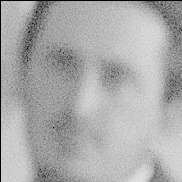

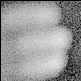

In [10]:
# THIS IS A TEXT RUN TO COLLECT CROPPED FACES. STANDALONE RUN
cv_img=img.convert("RGB")
drawing=ImageDraw.Draw(cv_img)

faces = []

for x,y,w,h in face_boxes:
    drawing.rectangle((x,y,x+w,y+h), outline="black")
    face = cv_img.crop((x,y,x+w,y+h))
    faces.append(face)
    
#display(cv_img)
for face in faces:
    display(face)

TOTAL 8 FACES IN a-0.png


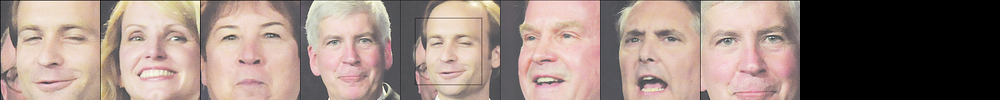

TOTAL 2 FACES IN a-3.png


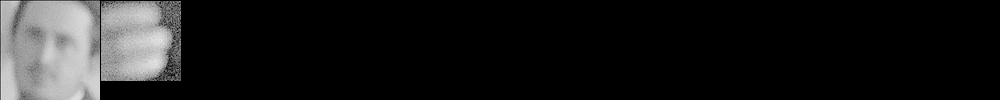

In [14]:
# THIS IS CREATING THE CONTACT_SHEET FROM THE FACES_DICTIONARY
for file_name in string_IN:
    num_faces = len(FaceBoxes_Dictionary["faces_in_"+file_name])
    if num_faces == 0:
        print("NO FACES FOUND IN FILE:", file_name)
    else:
        print("TOTAL {} FACES IN {}".format(num_faces, file_name))
    h=math.ceil(len(FaceBoxes_Dictionary["faces_in_"+file_name])/10)
    sheet=Image.new('RGB',(1000, 100*h))
    xc = 0
    yc = 0
    for face in FaceBoxes_Dictionary["faces_in_"+file_name]:
        face.thumbnail((100,100),Image.ANTIALIAS)
        sheet.paste(face, (xc, yc))
        if xc + 100 == sheet.width:
            xc = 0
            yc += 100
        else:
            xc += 100
                        
    display(sheet)

In [24]:
# NOW IS THE TIME TO COMBINE ALL THESE LITTLE PIECES INTO ONE SINGLE USER-DEFINED FUNCTION TO GET REUSLTS IN ONE CLICK

import zipfile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import math

# FACE DETECTION CLASSIFIER WHICH RUNS HAAR CASCADE ALGORITHM
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

def STRING_SEARCH_n_FACE_RECOGNITION(ZIPFILE_NAME, STRING_SEARCH):
    
    with zipfile.ZipFile(ZIPFILE_NAME,"r") as Z:
        File_Names = Z.namelist()
        print("THE GIVEN ZIPFILE: "+ZIPFILE_NAME+" CONTAINS FOLLOWING FILES:", File_Names)
        for i in File_Names:
            Z.extract(i)
    
    
    Text_Dictionary = {}
    for file in File_Names:
        image=Image.open(file)
        Text_Dictionary[file] = pytesseract.image_to_string(image)
    
    
    string_IN = []
    for key in Text_Dictionary.keys():
        if STRING_SEARCH in Text_Dictionary[key]:
            string_IN.append(key)
    print("THE GIVEN STRING '"+STRING_SEARCH+"' IS FOUND IN FOLLOWING FILES:", string_IN)
            
    FaceBoxes_Dictionary = {}

    for file_name in string_IN:
        img = Image.open(file_name)
        open_cv_version=img.convert("L")
        open_cv_version.save("L_CONVERTED_"+file_name)
        cv_img=cv.imread("L_CONVERTED_"+file_name)

        face_boxes = face_cascade.detectMultiScale(cv_img, 1.5)
    
        FaceBoxes_Dictionary[file_name] = face_boxes
    
        FaceBoxes_Dictionary["faces_in_"+file_name] = []
        cv_img=img.convert("RGB")
        drawing=ImageDraw.Draw(cv_img)
        for x,y,w,h in face_boxes:
            drawing.rectangle((x,y,x+w,y+h), outline="black")
            face = cv_img.crop((x,y,x+w,y+h))
            FaceBoxes_Dictionary["faces_in_"+file_name].append(face)
            
    for file_name in string_IN:
        num_faces = len(FaceBoxes_Dictionary["faces_in_"+file_name])
        if num_faces == 0:
            print("NO FACES FOUND IN FILE:", file_name)
            continue
        else:
            print("TOTAL {} FACES IN {}".format(num_faces, file_name))
            
            h=math.ceil(len(FaceBoxes_Dictionary["faces_in_"+file_name])/10)
            sheet=Image.new('RGB',(1000, 100*h))
            xc = 0
            yc = 0
            print("FOLLOWING FACES FOUND IN FILE:", file_name)
            for face in FaceBoxes_Dictionary["faces_in_"+file_name]:
                face.thumbnail((100,100),Image.ANTIALIAS)
                sheet.paste(face, (xc, yc))
                if xc + 100 == sheet.width:
                    xc = 0
                    yc += 100
                else:
                    xc += 100
            display(sheet)
        
    return "PROCESS COMPLETED"


THE GIVEN ZIPFILE: readonly/small_img.zip CONTAINS FOLLOWING FILES: ['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png']
THE GIVEN STRING 'When I abandoned beauty for strength' IS FOUND IN FOLLOWING FILES: ['a-2.png']
TOTAL 2 FACES IN a-2.png
FOLLOWING FACES FOUND IN FILE: a-2.png


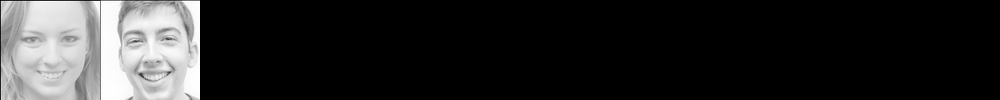

'PROCESS COMPLETED'

In [20]:
# THIS IS TEST RUN FOR USER-DEFINED FUNCTION
STRING_SEARCH_n_FACE_RECOGNITION("readonly/small_img.zip", "When I abandoned beauty for strength")

THE GIVEN ZIPFILE: readonly/small_img.zip CONTAINS FOLLOWING FILES: ['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png']
THE GIVEN STRING 'Christopher' IS FOUND IN FOLLOWING FILES: ['a-0.png', 'a-3.png']
TOTAL 8 FACES IN a-0.png
FOLLOWING FACES FOUND IN FILE: a-0.png


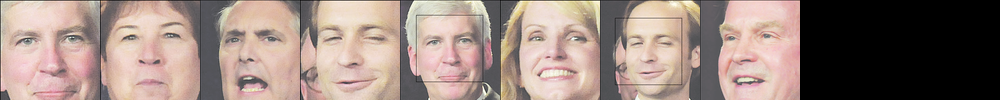

TOTAL 2 FACES IN a-3.png
FOLLOWING FACES FOUND IN FILE: a-3.png


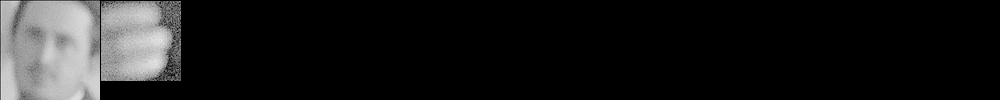

'PROCESS COMPLETED'

In [21]:
STRING_SEARCH_n_FACE_RECOGNITION("readonly/small_img.zip", "Christopher")

THE GIVEN ZIPFILE: readonly/images.zip CONTAINS FOLLOWING FILES: ['a-0.png', 'a-1.png', 'a-10.png', 'a-11.png', 'a-12.png', 'a-13.png', 'a-2.png', 'a-3.png', 'a-4.png', 'a-5.png', 'a-6.png', 'a-7.png', 'a-8.png', 'a-9.png']
THE GIVEN STRING 'Mark' IS FOUND IN FOLLOWING FILES: ['a-0.png', 'a-1.png', 'a-10.png', 'a-13.png', 'a-2.png', 'a-3.png', 'a-8.png']
TOTAL 8 FACES IN a-0.png
FOLLOWING FACES FOUND IN FILE: a-0.png


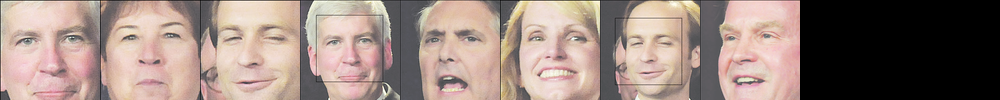

TOTAL 6 FACES IN a-1.png
FOLLOWING FACES FOUND IN FILE: a-1.png


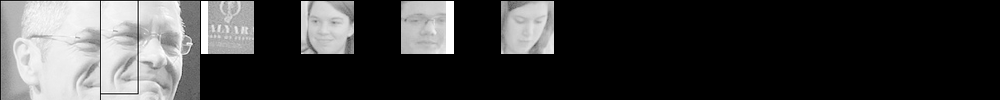

NO FACES FOUND IN FILE: a-10.png
TOTAL 2 FACES IN a-13.png
FOLLOWING FACES FOUND IN FILE: a-13.png


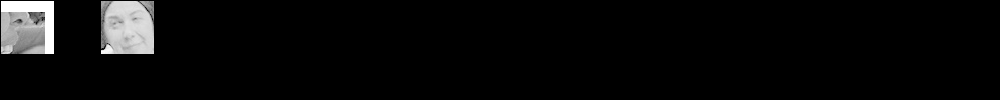

TOTAL 2 FACES IN a-2.png
FOLLOWING FACES FOUND IN FILE: a-2.png


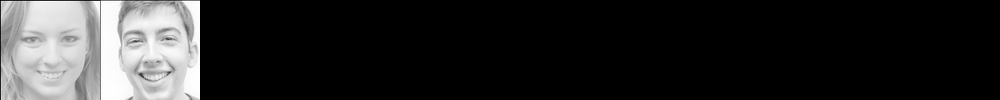

TOTAL 2 FACES IN a-3.png
FOLLOWING FACES FOUND IN FILE: a-3.png


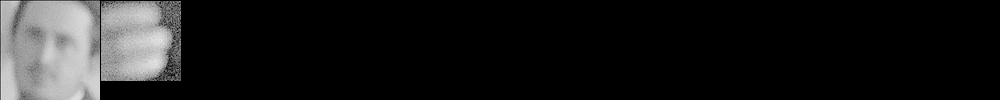

TOTAL 1 FACES IN a-8.png
FOLLOWING FACES FOUND IN FILE: a-8.png


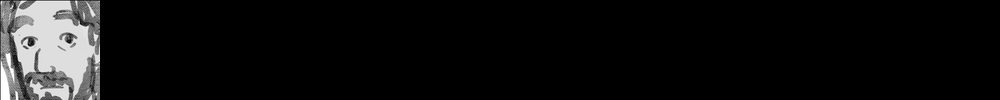

'PROCESS COMPLETED'

In [25]:
STRING_SEARCH_n_FACE_RECOGNITION("readonly/images.zip", "Mark")